This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

# 위 코드는 tensorflow.keras.datasets 모듈에서 imdb 데이터셋을 로드하는 코드입니다. imdb 데이터셋은 50,000개의 영화 리뷰로 구성되어 있으며, 
# 이 중 25,000개는 훈련용으로, 나머지 25,000개는 테스트용으로 나뉘어져 있습니다. 각 리뷰는 긍정(positive) 혹은 부정(negative)의 감성을 나타내는 이진 분류 문제입니다.
# load_data() 함수의 num_words 매개변수는 훈련 데이터에서 가장 자주 등장하는 단어 10,000개만 사용하겠다는 의미입니다. 
# 이를 통해 모델 학습에 사용되는 단어의 수를 제한하고, 모델의 복잡도를 줄일 수 있습니다.

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
# 가장 자주 등장하는 단어 1만 개로 제한
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [6]:
# 리뷰데이터 영단어로 변경
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])



# IMDB 데이터셋으로부터 가져온 리뷰 데이터는 정수 리스트로 이루어져 있습니다. 
# 이 리스트는 사전에 저장된 각 단어들의 인덱스들을 담고 있습니다. 
# 이때, get_word_index 함수를 이용해 단어와 해당 단어의 인덱스를 딕셔너리 형태로 가져옵니다.
# 그 후, 이 딕셔너리를 이용해 리뷰 데이터를 사람이 읽을 수 있는 형태로 변환합니다. 
# 이를 위해서, 딕셔너리를 뒤집어서 단어의 인덱스와 단어를 매핑한 새로운 딕셔너리를 생성합니다. 
# 그리고 나서 train_data[0] 에는 첫번째 리뷰 데이터가 저장되어 있습니다. 
# 이 데이터를 for loop 를 이용하여 단어 인덱스들을 이용해 사람이 읽을 수 있는 문장으로 변환합니다. 
# 만약 단어 인덱스가 딕셔너리에 없을 경우 "?" 로 표기됩니다. 변환된 문장은 decoded_review 변수에 저장됩니다.

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 이 함수는 입력 시퀀스를 dimension 크기의 영벡터로 변환합니다. 
# 이 때, 입력 시퀀스의 원소는 정수 값으로 이루어져 있으며, 이를 원-핫 인코딩 방식으로 벡터화합니다. 
# 예를 들어, 1번 시퀀스에서 3번 원소가 존재한다면, 이를 10,000차원의 영벡터에 대응하는 3번째 원소의 값을 1로 만들어 결과 벡터에 반영합니다. 
# 이렇게 변환된 벡터는 각 원소가 0 또는 1의 값을 갖는 이진 벡터가 됩니다.
# 최종적으로 vectorize_sequences() 함수는 변환된 벡터들을 담은 넘파이 배열을 반환합니다. 이 배열은 x_train과 x_test 변수에 저장됩니다.

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# IMDB 데이터셋에서 각 리뷰는 긍정(positive) 또는 부정(negative)을 나타내는 레이블(label)이 포함되어 있습니다. 
# 이 레이블을 훈련 및 테스트 세트에서 부동 소수점 배열(float32)로 변환하는 작업을 수행하고 있습니다. 
# 이를 위해 numpy 라이브러리의 asarray 함수를 사용하고 있습니다. 
# astype 함수를 사용하여 int에서 float32로 데이터 타입을 변환하고 있습니다. 
# 이는 신경망에서 출력값으로 사용할 확률(0~1) 값의 범위와 일치하도록 하기 위함입니다.

### Building your model

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 위 코드는 케라스를 사용하여 신경망 모델을 정의하는 코드입니다.

# Sequential 모델은 여러 개의 레이어를 쌓아서 사용할 수 있습니다. 여기서는 3개의 레이어를 사용하여 모델을 구성합니다.

# 첫 번째와 두 번째 레이어는 Dense 레이어입니다. Dense 레이어는 입력 뉴런과 출력 뉴런을 모두 연결해줍니다. 
# 이 레이어에서는 16개의 뉴런을 사용하며, 활성화 함수로 relu를 사용합니다. relu 함수는 음수 값을 0으로 만들어주는 함수로, 이를 통해 비선형성을 추가합니다.

# 세 번째 레이어는 출력 레이어로, sigmoid 활성화 함수를 사용합니다. sigmoid 함수는 출력이 이진 클래스(0 또는 1)일 때 사용합니다. 
# 따라서 이 모델은 이진 분류 모델이며, 출력은 0 또는 1 중 하나입니다.

**Compiling the model**

In [13]:
# 확률을 출력할 때는 loss="binary_crossentropy"
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# model.compile은 학습과정을 설정하는 메서드입니다. 이 메서드를 통해 모델이 학습을 할 때 사용될 optimizer, loss function, 그리고 평가지표(metric)를 정의할 수 있습니다.
# 위 코드에서는 optimizer로 "rmsprop"을, loss로 "binary_crossentropy"을, metrics으로 "accuracy"를 사용하도록 설정했습니다. 
# 이러한 설정은 이진 분류 문제를 풀 때 일반적으로 사용됩니다. 
# "rmsprop"은 RMSprop 알고리즘을 사용한 optimizer이며, "binary_crossentropy"은 이진 분류 문제에서 사용되는 cross-entropy loss function입니다. 
# "accuracy"는 분류 모델의 성능을 평가할 때 사용되는 지표입니다.

### Validating your approach

**Setting aside a validation set**

In [14]:
# 검증세트 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5411 - accuracy: 0.7793 - val_loss: 0.4275 - val_accuracy: 0.8547
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3471 - accuracy: 0.8899 - val_loss: 0.3379 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2626 - accuracy: 0.9131 - val_loss: 0.3129 - val_accuracy: 0.8756
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2119 - accuracy: 0.9299 - val_loss: 0.2893 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1777 - accuracy: 0.9428 - val_loss: 0.2936 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1518 - accuracy: 0.9507 - val_loss: 0.2779 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1314 - accuracy: 0.9590 - val_loss: 0.2859 - val_accuracy: 0.8866
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

# history_dict는 훈련 과정에서 계산한 측정 지표들의 값을 갖는 딕셔너리입니다. 
# history_dict.keys()는 이 딕셔너리의 키(key)들을 리스트로 반환합니다. 
# 예를 들어, loss, accuracy, val_loss, val_accuracy 등이 이 딕셔너리의 키일 수 있습니다

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

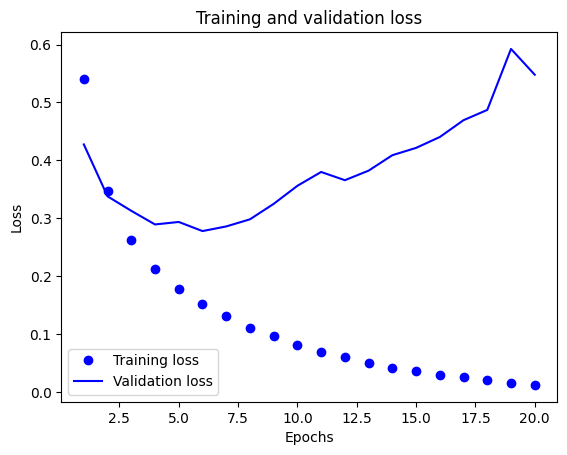

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 이 코드는 훈련 손실과 검증 손실을 시각화하는 코드입니다.

# history_dict에서 손실과 정확도를 담은 딕셔너리를 가져옵니다.
# loss_values는 훈련 데이터에서의 손실 값을 저장하고, val_loss_values는 검증 데이터에서의 손실 값을 저장합니다.
# epochs는 훈련을 진행한 epoch 수를 저장합니다.
# plt.plot() 함수를 이용해 훈련 손실과 검증 손실을 그래프로 나타냅니다.
# plt.title(), plt.xlabel(), plt.ylabel(), plt.legend() 함수를 이용해 그래프의 제목, 축 레이블, 범례 등을 설정합니다.
# plt.show() 함수를 이용해 그래프를 보여줍니다.
# 두 번째 에포크 이후부터 과대적합

**Plotting the training and validation accuracy**

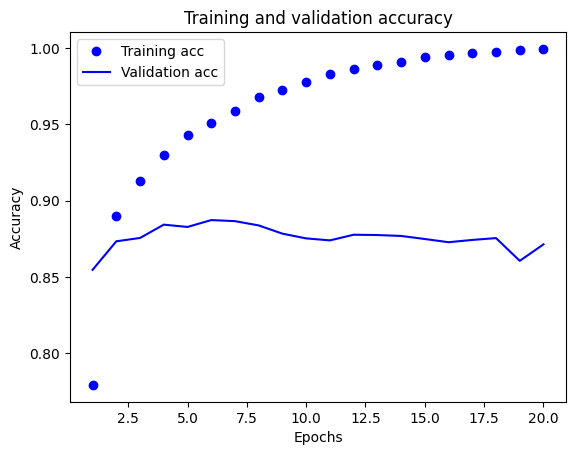

In [18]:
# 훈련과 검증 정확도
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# 이 코드는 이전에 학습한 모델의 정확도 변화를 시각화하는 코드입니다. 
# history.history를 통해 학습 기록을 가져온 후, 훈련 손실값(loss)과 검증 손실값(val_loss)을 시각화합니다. 
# 그리고 이어서 훈련 정확도(accuracy)와 검증 정확도(val_accuracy)를 시각화합니다. 
# plt.plot() 함수를 통해 선 그래프를 그리며, 각각의 축에 레이블(xlabel, ylabel)과 제목(title)을 추가하고, 범례(legend)를 생성합니다. 
# 마지막으로 plt.show() 함수를 호출하여 그래프를 표시합니다.
# 두 번째 에포크 이후부터 과대적합

**Retraining a model from scratch**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

# 위 코드는 IMDB 데이터셋을 사용하여, 단어 시퀀스를 긍정/부정으로 분류하는 이진 분류 모델을 만들고, 훈련과 평가하는 과정입니다.

# Sequential 모델을 생성합니다.
# Dense 층을 이용해 모델을 쌓습니다. 총 3개의 층이 사용되었습니다. 첫 번째와 두 번째 층은 relu 활성화 함수를 사용하고, 마지막 층은 sigmoid 활성화 함수를 사용합니다. 
# 이진 분류 문제에서는 sigmoid 활성화 함수를 출력층에서 사용하는 것이 일반적입니다.
# compile 메서드를 사용하여 모델의 손실 함수, 최적화 알고리즘, 평가 지표를 정의합니다.
# fit 메서드를 사용하여 모델을 훈련합니다. 훈련 데이터와 검증 데이터를 사용하여 훈련하며, 총 4번의 에포크를 훈련합니다. 배치 크기는 512로 지정합니다.
# evaluate 메서드를 사용하여 테스트 데이터에서 모델을 평가합니다. 이진 분류 문제에서는 binary_crossentropy 손실 함수를 사용합니다. 평가 지표로는 accuracy를 사용합니다.

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4575 - accuracy: 0.8111
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2672 - accuracy: 0.9053
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2069 - accuracy: 0.9250
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2942 - accuracy: 0.8835


In [29]:
results

[0.2941582500934601, 0.8835200071334839]

In [23]:
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=6, batch_size=512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/6
49/49 [==============================] - 1s 15ms/step - loss: 0.5050 - accuracy: 0.7959
Epoch 2/6
49/49 [==============================] - 1s 15ms/step - loss: 0.2931 - accuracy: 0.8984
Epoch 3/6
49/49 [==============================] - 1s 14ms/step - loss: 0.2243 - accuracy: 0.9204
Epoch 4/6
49/49 [==============================] - 1s 14ms/step - loss: 0.1898 - accuracy: 0.9315
Epoch 5/6
49/49 [==============================] - 1s 14ms/step - loss: 0.1660 - accuracy: 0.9406
Epoch 6/6
782/782 [==============================] - 1s 1ms/step - loss: 0.3088 - accuracy: 0.8820


In [24]:
results1

[0.30878564715385437, 0.8820000290870667]

In [25]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model2.fit(x_train, y_train, epochs=10, batch_size=512)
results2 = model1.evaluate(x_test, y_test)

Epoch 1/10
49/49 [==============================] - 1s 15ms/step - loss: 0.5061 - accuracy: 0.8059
Epoch 2/10
49/49 [==============================] - 1s 14ms/step - loss: 0.3089 - accuracy: 0.8974
Epoch 3/10
49/49 [==============================] - 1s 14ms/step - loss: 0.2368 - accuracy: 0.9169
Epoch 4/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1988 - accuracy: 0.9305
Epoch 5/10
49/49 [==============================] - 1s 14ms/step - loss: 0.1745 - accuracy: 0.9389
Epoch 6/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1566 - accuracy: 0.9456
Epoch 7/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1417 - accuracy: 0.9516
Epoch 8/10
49/49 [==============================] - 1s 14ms/step - loss: 0.1284 - accuracy: 0.9563
Epoch 9/10
49/49 [==============================] - 1s 13ms/step - loss: 0.1176 - accuracy: 0.9611
Epoch 10/10
782/782 [==============================] - 1s 2ms/step - loss: 0.3088 - accuracy: 0.8820


In [26]:
results2

[0.30878564715385437, 0.8820000290870667]

### Using a trained model to generate predictions on new data

In [30]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.25445402],
       [0.9997605 ],
       [0.94556814],
       ...,
       [0.11763625],
       [0.07184334],
       [0.67734313]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [31]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [32]:
len(train_data)

8982

In [33]:
len(test_data)

2246

In [34]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [35]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])


# reuters.get_word_index() 함수를 사용하여 로이터 뉴스 데이터셋의 단어 인덱스를 가져옵니다. 
# 가져온 인덱스를 뒤집어서 reverse_word_index라는 딕셔너리를 만듭니다. reverse_word_index의 키와 값은 각각 단어와 그 단어에 해당하는 인덱스입니다.
# 그 다음으로는 train_data 리스트의 첫 번째 원소에 해당하는 문서를 가져옵니다. 
# 이 문서는 정수 리스트로 되어 있으며, 각 정수는 단어 인덱스를 나타냅니다. 
# 이 정수 리스트를 반복하면서 각 정수에 해당하는 단어를 reverse_word_index 딕셔너리에서 찾아서 문자열로 변환합니다. 
# 단어 인덱스에서 3을 빼는 이유는, 0, 1, 2는 패딩, 문서 시작, 사전에 없음을 나타내는 인덱스로 사용되기 때문입니다.
# 마지막으로 join() 함수를 사용하여 각 단어 문자열을 하나의 문자열로 합쳐서 decoded_newswire 변수에 저장합니다.

550378/550378 [==============================] - 0s 0us/step


In [36]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [37]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [38]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

# to_one_hot 함수는 label을 one-hot encoding으로 변환하는 함수입니다. 
# one-hot encoding은 categorical 데이터의 표현 방법 중 하나로, 해당하는 category의 인덱스에 해당하는 값은 1로 표시하고 나머지 값은 모두 0으로 표시하는 방법입니다.
# 이 함수는 labels 리스트를 받아, 이를 len(labels) x dimension 크기의 0으로 채워진 행렬로 만들고, 
# enumerate 함수를 이용하여 각 레이블에 대한 one-hot encoding 값을 해당하는 행렬 위치에 채워 넣습니다. 이렇게 만들어진 one-hot encoding 행렬을 반환합니다.
# 위 코드에서는 train data와 test data의 label을 one-hot encoding으로 변환한 후, y_train과 y_test에 각각 저장한 것을 볼 수 있습니다.

In [39]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [41]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 이 모델의 손실함수는 categorical_crossentropy로 설정되어 있습니다. 
# categorical_crossentropy는 다중 분류 문제에 사용되는 손실함수로, 출력값이 클래스별로 확률값으로 계산되는 경우 적합합니다. 
# 이 손실함수는 모델이 예측한 확률값과 실제 정답 클래스의 확률값을 비교하여 오차를 계산합니다. 
# 최적화 알고리즘으로는 rmsprop이 설정되어 있습니다. 모델의 성능을 평가하는 지표로는 accuracy가 설정되어 있습니다.

### Validating your approach

**Setting aside a validation set**

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.5273 - accuracy: 0.4965 - val_loss: 1.7387 - val_accuracy: 0.6090
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.4649 - accuracy: 0.6810 - val_loss: 1.3501 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 1.1475 - accuracy: 0.7437 - val_loss: 1.1831 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9412 - accuracy: 0.7955 - val_loss: 1.0775 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7789 - accuracy: 0.8315 - val_loss: 1.0155 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 0s 31ms/step - loss: 0.6480 - accuracy: 0.8569 - val_loss: 0.9572 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.5385 - accuracy: 0.8852 - val_loss: 0.9707 - val_accuracy: 0.7940
Epoch 8/20
16

**Plotting the training and validation loss**

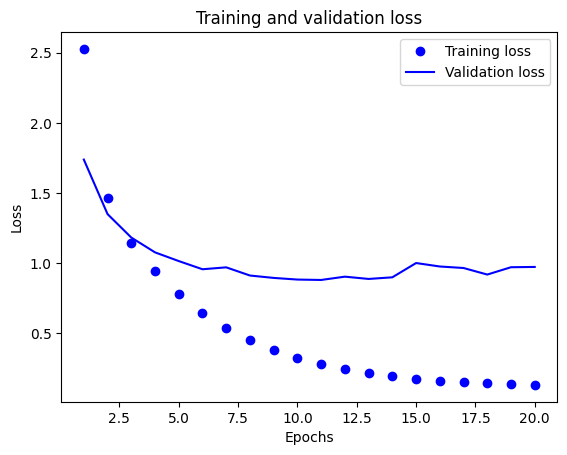

In [44]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 아홉번째 이후 과대적합

**Plotting the training and validation accuracy**

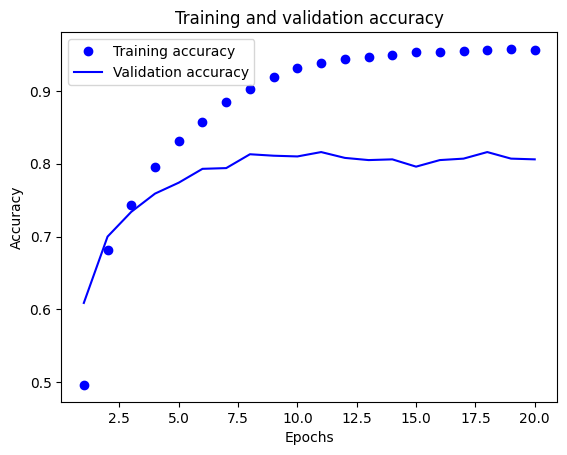

In [45]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# 아홉번째 이후 과대적합

**Retraining a model from scratch**

In [46]:
# 아홉 번 에포크로 새로운 모델
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 32ms/step - loss: 2.7537 - accuracy: 0.4729
Epoch 2/9
18/18 [==============================] - 0s 28ms/step - loss: 1.5011 - accuracy: 0.6780
Epoch 3/9
18/18 [==============================] - 1s 28ms/step - loss: 1.1317 - accuracy: 0.7527
Epoch 4/9
18/18 [==============================] - 0s 27ms/step - loss: 0.9201 - accuracy: 0.8010
Epoch 5/9
18/18 [==============================] - 1s 28ms/step - loss: 0.7613 - accuracy: 0.8363
Epoch 6/9
18/18 [==============================] - 0s 27ms/step - loss: 0.6354 - accuracy: 0.8605
Epoch 7/9
18/18 [==============================] - 1s 29ms/step - loss: 0.5325 - accuracy: 0.8864
Epoch 8/9
18/18 [==============================] - 0s 27ms/step - loss: 0.4463 - accuracy: 0.9041
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9351 - accuracy: 0.7854


In [47]:
results

[0.9350662231445312, 0.7853962779045105]

In [48]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

# 위 코드는 테스트 레이블을 복사한 후, 랜덤하게 섞어서 원래 레이블과 일치하는 경우의 비율을 계산하는 코드입니다.
# 이를 통해 모델의 성능이 얼마나 좋은지를 확인할 수 있습니다. 만약 성능이 좋다면, 섞인 레이블과 원래 레이블이 일치할 확률이 높아져 비율은 1에 가까워질 것입니다.

0.18165627782724844

### Generating predictions on new data

In [49]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [50]:
predictions[0].shape

(46,)

In [51]:
np.sum(predictions[0])

1.0000001

In [52]:
np.argmax(predictions[0])

# 가장 큰 값이 예측 클래스, 즉 가장 확률이 높은 클래스

3

### A different way to handle the labels and the loss

In [53]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [54]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 이 코드는 다중 분류 문제에서 사용하는 손실 함수인 sparse_categorical_crossentropy와 측정 지표인 accuracy를 사용하여 모델을 컴파일합니다.
# sparse_categorical_crossentropy는 각 샘플에 대한 원-핫 인코딩된 레이블이 아니라 정수 형태의 레이블을 입력으로 받습니다. 
# 이 함수는 내부적으로 입력된 레이블을 자동으로 원-핫 인코딩하여 손실 값을 계산합니다.
# 즉, to_categorical 함수를 사용하여 레이블을 원-핫 인코딩할 필요가 없습니다. 따라서 메모리 사용량이 더 적고 계산 속도가 더 빠릅니다.

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [55]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

# 위 코드는 다중 분류(Multi-class classification) 문제를 해결하기 위한 신경망 모델을 구성하고 학습하는 코드입니다.

# Sequential 모델 객체를 생성합니다.
# Dense 층을 이용하여 64개의 은닉 유닛과 ReLU 활성화 함수를 가지는 층을 추가합니다.
# 다음으로, 4개의 은닉 유닛과 ReLU 활성화 함수를 가지는 층을 추가합니다.
# 마지막으로, 46개의 클래스를 구분할 수 있는 softmax 활성화 함수를 가지는 출력층을 추가합니다.
# 모델을 컴파일합니다. 이때, rmsprop 옵티마이저를 사용하며, categorical_crossentropy 손실 함수와 accuracy 평가 지표를 사용합니다.
# fit 메소드를 호출하여 모델을 학습합니다. 이때, 20번의 에포크(epoch)동안 학습하며, 배치 크기는 128로 설정합니다. 
# 또한, 검증 데이터셋(x_val, y_val)을 이용하여 모델의 성능을 평가합니다.
# 검증 정확도 손실의 원인 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 2.5773 - accuracy: 0.4921 - val_loss: 1.9000 - val_accuracy: 0.5430
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.7279 - accuracy: 0.5466 - val_loss: 1.6236 - val_accuracy: 0.5590
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.4763 - accuracy: 0.5848 - val_loss: 1.4956 - val_accuracy: 0.6060
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3065 - accuracy: 0.6396 - val_loss: 1.4120 - val_accuracy: 0.6400
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1814 - accuracy: 0.6829 - val_loss: 1.3576 - val_accuracy: 0.6600
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 1.0796 - accuracy: 0.7149 - val_loss: 1.3416 - val_accuracy: 0.6740
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9916 - accuracy: 0.7390 - val_loss: 1.3278 - val_accuracy: 0.6790
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [56]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [57]:
train_data.shape

(404, 13)

In [58]:
test_data.shape

(102, 13)

In [59]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [60]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [62]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)   # 스칼라 회귀를 위한 궛ㅇ
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

# 이 함수는 3개의 Dense 레이어를 가진 Sequential 모델을 생성합니다. 
# 각 레이어는 64개의 뉴런을 가지고 있으며, 첫 번째와 두 번째 레이어는 ReLU 활성화 함수를 사용하고, 마지막 레이어는 활성화 함수를 지정하지 않았습니다. 
# 모델은 rmsprop 옵티마이저를 사용하여 mse 손실 함수를 최소화하고 mae 지표를 사용하여 모니터링합니다. 이 함수는 모델 객체를 반환합니다.
#샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용 

### Validating your approach using K-fold validation

**K-fold validation**

In [63]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


# 교차 검증을 수행하는 코드입니다. k는 데이터를 k개의 분할로 나누어 각각의 폴드에서 모델을 학습하고 검증하는데 사용합니다.
#  num_val_samples는 검증 데이터 샘플의 수를 의미하며, num_epochs는 모델을 학습할 때 사용할 에포크의 수를 의미합니다.

# 각 폴드에서는 val_data와 val_targets를 검증 데이터로, partial_train_data와 partial_train_targets를 훈련 데이터로 사용합니다. 
# build_model() 함수를 사용하여 모델을 구성하고, 훈련 데이터를 사용하여 모델을 학습합니다. 검증 데이터를 사용하여 모델을 평가하고, 
# 평가 지표 중 하나인 val_mae를 all_scores 리스트에 추가합니다.

# 이렇게 모든 폴드에서 수행한 교차 검증 결과를 all_scores 리스트에 저장하여, 평균적인 검증 점수를 계산하고, 모델의 성능을 평가합니다.

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [64]:
all_scores
# 검증 점수

[1.96833336353302, 2.333244800567627, 2.4388585090637207, 2.504141092300415]

In [65]:
np.mean(all_scores)

2.3111444413661957

**Saving the validation logs at each fold**

In [66]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

# 이 코드는 K-Fold 교차 검증을 이용하여 모델을 학습하는 과정에서, 검증 세트의 MAE 값을 모니터링하기 위해 학습 과정에서 발생하는 MAE 값을 모두 기록하는 코드입니다.

# K-Fold 교차 검증을 이용하기 위해 k 값이 먼저 정해지고, 전체 데이터를 k개로 나누어 하나의 부분을 검증 데이터셋, 
# 나머지 부분을 훈련 데이터셋으로 사용합니다. 이때 num_val_samples 변수를 사용하여 각 검증 데이터셋의 크기를 계산하고, 
# val_data, val_targets, partial_train_data, partial_train_targets 변수를 이용하여 검증 데이터셋과 훈련 데이터셋을 분할합니다.

# 모델을 학습하기 위해 build_model() 함수를 호출하여 모델 객체를 생성하고, history 변수에 fit() 메서드의 반환값인 학습 이력(history)을 저장합니다. 
# 이때, 검증 데이터셋을 이용하여 검증 MAE 값을 계산하기 위해 validation_data 인자를 추가로 설정하였습니다. 
# 학습 과정에서 발생한 검증 MAE 값을 history.history["val_mae"] 형태로 추출하여 mae_history 리스트에 추가합니다. 
# 이 과정을 k번 반복하면, 모든 검증 데이터셋에서 발생한 검증 MAE 값의 이력이 all_mae_histories 리스트에 저장됩니다.

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [67]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# average_mae_history는 all_mae_histories에 저장된 각 fold의 검증 세트 mae 값을 평균내서 저장하는 리스트입니다.

# all_mae_histories는 k-fold 교차 검증 시 각 fold에서 얻은 검증 세트 mae 값을 저장하는 리스트이며, 각 epoch 별로 저장됩니다.

# 위 코드는 all_mae_histories에 저장된 리스트에서 같은 epoch 값에 해당하는 각 fold의 mae 값을 평균내서 average_mae_history 리스트에 저장하는 것입니다. 
# 이를 통해 k-fold 교차 검증에서 얻은 모든 fold의 성능 값을 평균낸 값을 epoch 별로 확인할 수 있습니다.

**Plotting validation scores**

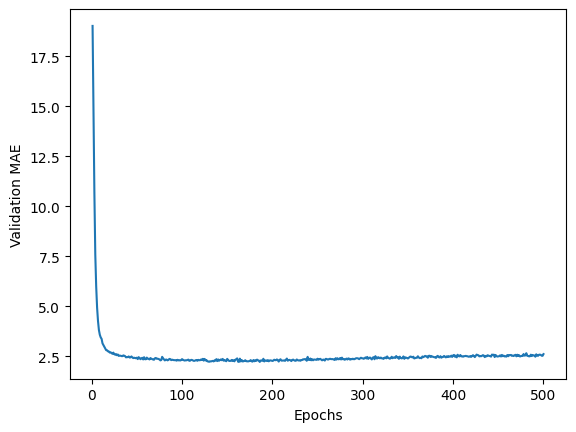

In [68]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

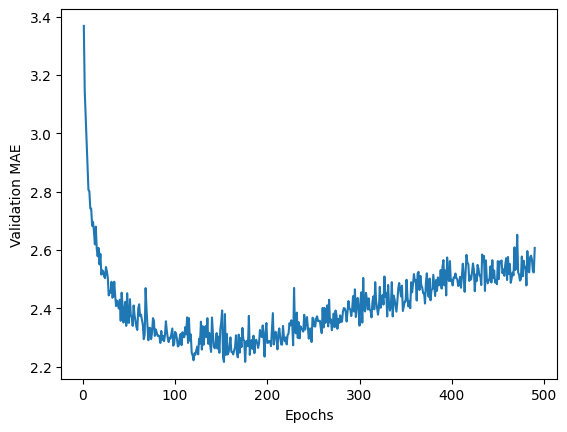

In [69]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# 이 코드는 이전에 만들어진 4-겹 교차 검증을 바탕으로 각 epoch에 대한 평균 검증 MAE를 계산하고, 이를 그래프로 시각화합니다.

# 첫째 줄에서는 평균 MAE를 저장할 리스트를 만듭니다. 리스트 내포를 사용하여 0~num_epochs 범위의 인덱스 i에 대해, 
# all_mae_histories 리스트 내 각 폴드의 i번째 요소들의 평균값을 average_mae_history 리스트에 저장합니다.

# 둘째 줄에서는 앞에서 계산한 평균 MAE 리스트에서 처음 10개 값을 제외하고 truncated_mae_history 리스트에 저장합니다.

# 셋째 줄에서는 그래프를 그리기 위해 Matplotlib 라이브러리를 사용합니다. 
# x축은 1부터 truncated_mae_history 리스트의 길이까지의 값으로 설정하고, y축은 평균 검증 MAE로 설정합니다. 
# 마지막으로 plt.show() 함수를 호출하여 그래프를 출력합니다.

**각 포인트를 이전 포인트의 지수이동평균으로 대체**

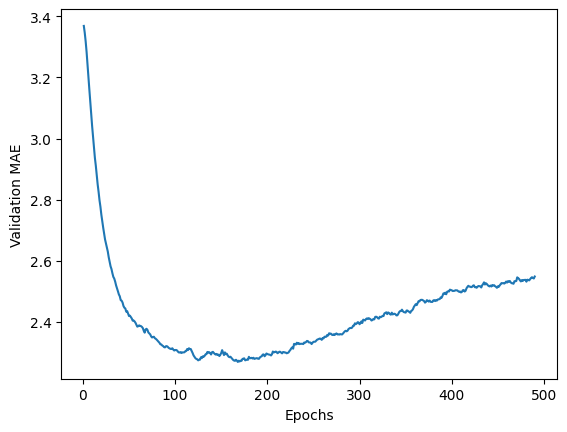

In [71]:
def smooth_curve(points,factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# 이 코드는 이전에 구한 validation MAE(평균 절대 오차)의 이동 평균을 계산하여 그래프로 시각화합니다.

# 우선 smooth_curve 함수는 points 리스트의 값을 smoothing factor factor를 사용하여 이동 평균으로 smoothing한 값을 계산합니다.
#  factor가 1에 가까울수록 smoothing 효과는 적고, 0에 가까울수록 smoothing 효과는 큽니다.

# 이어서 average_mae_history에서 처음 10개의 값은 제외하고, 나머지 값들에 대해 smooth_curve 함수를 적용하여 smooth_mae_history를 구합니다.
# 그리고 x축은 1부터 데이터 개수까지(epochs), y축은 smooth_mae_history의 값으로 지정하여 그래프를 출력합니다.

**Training the final model**

In [72]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

# 위 코드는 이전에 구성한 모델을 사용하여 전체 train 데이터를 학습시킨 후, test 데이터에 대해 평가하는 코드입니다. 
# 모델 학습에는 130 epochs를 사용하고, batch size는 16으로 지정되었습니다. 
# 모델 평가 결과로 test 데이터에 대한 mse와 mae가 계산되고, 각각 test_mse_score와 test_mae_score 변수에 저장됩니다.

4/4 [==============================] - 0s 3ms/step - loss: 14.3358 - mae: 2.6888


In [73]:
test_mae_score

2.688840866088867

### Generating predictions on new data

In [74]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([9.7336235], dtype=float32)

### Wrapping up

## Summary

#####가용한 데이터가 적다면 K-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법
#####가용한 훈련데이터가 적다면 과대적합을 피하기 위해 은닉층의 수를 줄인 모델이 좋음(일반적으로 1개 또는 2개)
#####MSE는 회귀에서 자주 사용되는 손실 함수
#####정확도 개념은 회귀에서 적용 안 됨.일반적인 회귀 지표는 평균 절대 오차(MAE)
#####입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야함